<a href="https://colab.research.google.com/github/jagodek/machine-learning-basics/blob/main/lab4/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
!pip install pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import sklearn

In [3]:
sklearn.__version__

'1.2.2'

In [58]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib import ticker


In [5]:
workclass_vals = ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked']
education_vals = ['Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool']
marital_status_vals = ['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse']
occupation_vals = ['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces']
relation_vals = ['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried']
race_vals = ['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black']
native_country_vals = ['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands']
categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

categorical_vals = [workclass_vals,education_vals,marital_status_vals,occupation_vals,relation_vals,race_vals,native_country_vals]



In [6]:
column_names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]
raw_data = pd.read_csv("adult.data",sep='\s*,\s*',names=column_names,index_col=False)
raw_test = pd.read_csv("adult.test",sep='\s*,\s*',names=column_names,index_col=False,skiprows=1)

<ipython-input-6-53980ef132da>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  raw_data = pd.read_csv("adult.data",sep='\s*,\s*',names=column_names,index_col=False)
<ipython-input-6-53980ef132da>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  raw_test = pd.read_csv("adult.test",sep='\s*,\s*',names=column_names,index_col=False,skiprows=1)


# New Section

In [7]:
raw_data.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [8]:
raw_test.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [9]:
raw_data = raw_data.replace("?",np.NaN)
raw_test = raw_test.replace("?",np.NaN)

In [10]:
raw_data.columns[raw_data.isna().sum() > 0] #missing values in columns:

Index(['workclass', 'occupation', 'native-country'], dtype='object')

In [11]:
raw_test.columns[raw_test.isna().sum() > 0]

Index(['workclass', 'occupation', 'native-country'], dtype='object')

In [12]:
raw_test.shape

(16281, 15)

In [13]:
raw_test.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [14]:
raw_data.shape

(32561, 15)

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputed_data = raw_data.copy()
imputed_data[['workclass','occupation', 'native-country']] = pd.DataFrame(imputer.fit_transform(imputed_data[['workclass','occupation', 'native-country']]),index=imputed_data.index,columns=['workclass','occupation', 'native-country'])
imputed_test = raw_test.copy()
imputed_test[['workclass','occupation', 'native-country']] = pd.DataFrame(imputer.fit_transform(imputed_test[['workclass','occupation', 'native-country']]),index=imputed_test.index,columns=['workclass','occupation', 'native-country'])

In [16]:
imputed_test[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']] =  imputed_test[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].astype('float64')

In [17]:
imputed_test.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
income             object
dtype: object

In [18]:
Y_adults = imputed_data[['income']].copy()
X_adults = imputed_data.drop(columns='income')
Y_adults_test = imputed_test[['income']].copy()
X_adults_test = imputed_test.drop(columns='income')

In [19]:
X_adults[['sex']] = X_adults[['sex']].replace('Male',1)
X_adults[['sex']] = X_adults[['sex']].replace('Female',0)
X_adults_test[['sex']] = X_adults_test[['sex']].replace('Male',1)
X_adults_test[['sex']] = X_adults_test[['sex']].replace('Female',0)

In [20]:
# Y_adults_test

In [21]:
Y_adults[['income']] = Y_adults[['income']].replace('<=50K',0)
Y_adults[['income']] = Y_adults[['income']].replace('>50K',1)
Y_adults_test[['income']] = Y_adults_test[['income']].replace('<=50K.',0)
Y_adults_test[['income']] = Y_adults_test[['income']].replace('<=50K',0)
Y_adults_test[['income']] = Y_adults_test[['income']].replace('>50K.',1)
Y_adults_test[['income']] = Y_adults_test[['income']].replace('>50K',1)

In [22]:
# [b for a in [[c+'_'+n for n in v] for c,v in zip(categorical,categorical_vals)] for b in a]

In [23]:
# X_adults.index

In [24]:
# [ a for b in categorical_vals for a in b]


In [25]:

new_cols = [b for a in [[c+'_'+n for n in v] for c,v in zip(categorical,categorical_vals)] for b in a]

oe = OneHotEncoder(categories =categorical_vals,handle_unknown='ignore',sparse_output=False)

Encoded = pd.DataFrame(oe.fit_transform(X_adults[categorical]),index=X_adults.index,columns=new_cols)
X_adults = X_adults.drop(columns=categorical)

X_adults = pd.concat([X_adults,Encoded],axis=1)


Encoded =pd.DataFrame(oe.fit_transform(X_adults_test[categorical]),index=X_adults_test.index,columns=new_cols)
X_adults_test = X_adults_test.drop(columns=categorical)

X_adults_test = pd.concat([X_adults_test,Encoded],axis=1)


In [26]:
Y_adults = Y_adults['income']
Y_adults_test = Y_adults_test['income']

In [27]:
X_adults.shape

(32561, 104)

In [28]:
# Y_adults_test

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score,cross_validate

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [31]:


# params = {'n_estimators':[1,5,10,50,100,500,1000]}
params = {'n_estimators':[1,5,10,50,100],'min_samples_split':[1,2,3,4,5,10,15,20,30,40],'min_samples_leaf':[1,2,3,4,5,10,20],'max_features':[1,2,3,5,9,10,11,12,15,20]}
params = {'n_estimators':[1,2],'min_samples_split':[1,2],'min_samples_leaf':[1,2],'max_features':[1,2]}

def estimate(params):

    inner_cv = KFold(n_splits=4, shuffle=True, random_state=0)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=0)

    RFC = RandomForestClassifier()

    # RF_n_est_out = GridSearchCV(
    #     estimator=RFC,
    #     param_grid=params,
    #     scoring='accuracy',
    #     n_jobs=-1,
    #     cv=outer_cv,
    #     verbose=1,
    #     refit=True
    # )

    grid_search = GridSearchCV(
        estimator=RFC,
        param_grid = params,
        scoring=['accuracy', 'precision', 'recall'],
        refit='accuracy',
        cv=inner_cv,
        verbose = 4,
        return_train_score=True
    )

    
    # score = cross_validate(grid_search,X_adults,Y_adults,scoring=['accuracy','precision','recall'],cv=outer_cv)
    score = grid_search.fit(X_adults,Y_adults)
    scoresDF = None # = pd.DataFrame(columns=["max_features","min_samples_leaf",'min_samples_split', 'n_estimators','accuracy','precission','recall','mean_score','standard_dev'])

    for par, mean_score, std_score in zip(
    grid_search.cv_results_['params'], 
    grid_search.cv_results_['mean_test_accuracy'], 
    grid_search.cv_results_['std_test_accuracy']):
        arr = []
        RFC.set_params(**par)
        y_pred = RFC.fit(X_adults,Y_adults).predict(X_adults)
        scores = cross_validate(RFC, X_adults, Y_adults, cv=outer_cv)
        print(f"Params: {par}")
        for i in par.values():
            arr.append(i)
        acc = accuracy_score(Y_adults, y_pred)
        arr.append(acc)
        print(f"Accuracy: {acc}")
        prec = precision_score(Y_adults, y_pred, average='macro')
        arr.append(prec)
        print(f"Precision: {prec}")
        rec = recall_score(Y_adults, y_pred, average='macro')
        arr.append(rec)
        print(f"Recall: {rec}")
        print(f"Mean score: {mean_score}, Standard deviation: {std_score}\n")
        arr.append(mean_score)
        arr.append(std_score)
        print(arr)
        
        if scoresDF is None:
            scoresDF = pd.DataFrame([arr],columns=["max_features","min_samples_leaf",'min_samples_split', 'n_estimators','accuracy','precission','recall','mean_score','standard_dev'])
        else:
            scoresDF =  pd.concat([scoresDF,pd.DataFrame([arr],columns=["max_features","min_samples_leaf",'min_samples_split', 'n_estimators','accuracy','precission','recall','mean_score','standard_dev'])],ignore_index=True)
    return grid_search,scoresDF
    # for fold,(accuracy,precision,recall) in enumerate(zip(score['accuracy'],score['precision'],score['recall'])):
    #     print(f"Outer Fold {fold}: Accuracy={accuracy}, Precision={precision}, Recall={recall}")


In [32]:
params = {'n_estimators':[1,2,90,100,110,200],'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2,3,4,5,10,20],'max_features':[1,2,3,5,9,10,11,12,15,20]}
params = {'n_estimators':[1,2,3],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3,5],'max_features':[1,2,3]}


In [33]:
model,scoresDF = estimate(params)

Fitting 4 folds for each of 108 candidates, totalling 432 fits
[CV 1/4] END max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1; accuracy: (train=0.924, test=0.799) precision: (train=0.838, test=0.588) recall: (train=0.849, test=0.586) total time=   0.1s
[CV 2/4] END max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1; accuracy: (train=0.925, test=0.798) precision: (train=0.849, test=0.584) recall: (train=0.838, test=0.587) total time=   0.1s
[CV 3/4] END max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1; accuracy: (train=0.927, test=0.789) precision: (train=0.854, test=0.569) recall: (train=0.839, test=0.530) total time=   0.1s
[CV 4/4] END max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=1; accuracy: (train=0.924, test=0.794) precision: (train=0.849, test=0.558) recall: (train=0.836, test=0.575) total time=   0.1s
[CV 1/4] END max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=2; acc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 3/4] END max_features=1, min_samples_leaf=5, min_samples_split=2, n_estimators=2; accuracy: (train=0.763, test=0.760) precision: (train=0.660, test=0.573) recall: (train=0.032, test=0.032) total time=   0.1s
[CV 4/4] END max_features=1, min_samples_leaf=5, min_samples_split=2, n_estimators=2; accuracy: (train=0.760, test=0.767) precision: (train=0.645, test=0.593) recall: (train=0.025, test=0.025) total time=   0.1s
[CV 1/4] END max_features=1, min_samples_leaf=5, min_samples_split=2, n_estimators=3; accuracy: (train=0.803, test=0.799) precision: (train=0.862, test=0.870) recall: (train=0.211, test=0.203) total time=   0.1s
[CV 2/4] END max_features=1, min_samples_leaf=5, min_samples_split=2, n_estimators=3; accuracy: (train=0.765, test=0.763) precision: (train=0.830, test=0.848) recall: (train=0.025, test=0.028) total time=   0.2s
[CV 3/4] END max_features=1, min_samples_leaf=5, min_samples_split=2, n_estimators=3; accuracy: (train=0.790, test=0.788) precision: (train=0.923, test=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 2/4] END max_features=1, min_samples_leaf=5, min_samples_split=3, n_estimators=2; accuracy: (train=0.778, test=0.771) precision: (train=0.823, test=0.770) recall: (train=0.096, test=0.078) total time=   0.1s
[CV 3/4] END max_features=1, min_samples_leaf=5, min_samples_split=3, n_estimators=2; accuracy: (train=0.783, test=0.778) precision: (train=0.773, test=0.730) recall: (train=0.135, test=0.133) total time=   0.1s
[CV 4/4] END max_features=1, min_samples_leaf=5, min_samples_split=3, n_estimators=2; accuracy: (train=0.802, test=0.807) precision: (train=0.949, test=0.954) recall: (train=0.194, test=0.185) total time=   0.1s
[CV 1/4] END max_features=1, min_samples_leaf=5, min_samples_split=3, n_estimators=3; accuracy: (train=0.801, test=0.796) precision: (train=0.821, test=0.811) recall: (train=0.218, test=0.212) total time=   0.1s
[CV 2/4] END max_features=1, min_samples_leaf=5, min_samples_split=3, n_estimators=3; accuracy: (train=0.772, test=0.770) precision: (train=0.926, test=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 1/4] END max_features=1, min_samples_leaf=5, min_samples_split=4, n_estimators=1; accuracy: (train=0.760, test=0.757) precision: (train=0.000, test=0.000) recall: (train=0.000, test=0.000) total time=   0.1s
[CV 2/4] END max_features=1, min_samples_leaf=5, min_samples_split=4, n_estimators=1; accuracy: (train=0.760, test=0.757) precision: (train=0.615, test=0.000) recall: (train=0.001, test=0.000) total time=   0.2s
[CV 3/4] END max_features=1, min_samples_leaf=5, min_samples_split=4, n_estimators=1; accuracy: (train=0.760, test=0.757) precision: (train=0.500, test=0.423) recall: (train=0.007, test=0.006) total time=   0.1s
[CV 4/4] END max_features=1, min_samples_leaf=5, min_samples_split=4, n_estimators=1; accuracy: (train=0.794, test=0.800) precision: (train=0.899, test=0.895) recall: (train=0.172, test=0.169) total time=   0.1s
[CV 1/4] END max_features=1, min_samples_leaf=5, min_samples_split=4, n_estimators=2; accuracy: (train=0.793, test=0.784) precision: (train=0.737, test=

In [34]:
scoresDF

,max_features,min_samples_leaf,min_samples_split,n_estimators,accuracy,precission,recall,mean_score,standard_dev
0,1,1,2,1,0.924020,0.897191,0.894271,0.794939,0.004114
1,1,1,2,2,0.925832,0.943234,0.853491,0.810632,0.002553
2,1,1,2,3,0.962624,0.952643,0.944383,0.818495,0.003774
3,1,1,3,1,0.904118,0.876861,0.854778,0.798286,0.004430
4,1,1,3,2,0.922023,0.919759,0.861389,0.813888,0.005212
...,...,...,...,...,...,...,...,...,...
103,3,5,3,2,0.844507,0.801494,0.746027,0.812352,0.029978
104,3,5,3,3,0.838150,0.815836,0.706181,0.830841,0.007749
105,3,5,4,1,0.792912,0.715310,0.671902,0.802217,0.013270
106,3,5,4,2,0.829520,0.798538,0.693617,0.828353,0.002297


In [35]:
import matplotlib.pyplot as plt

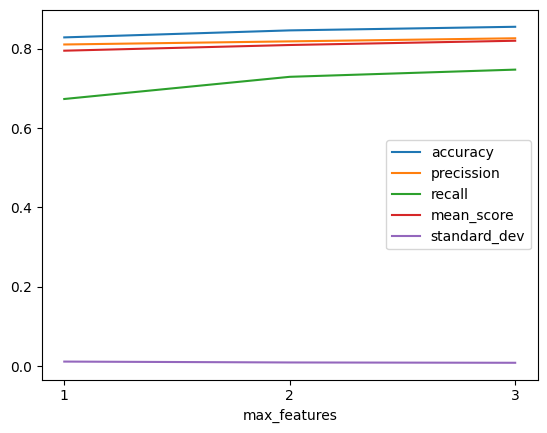

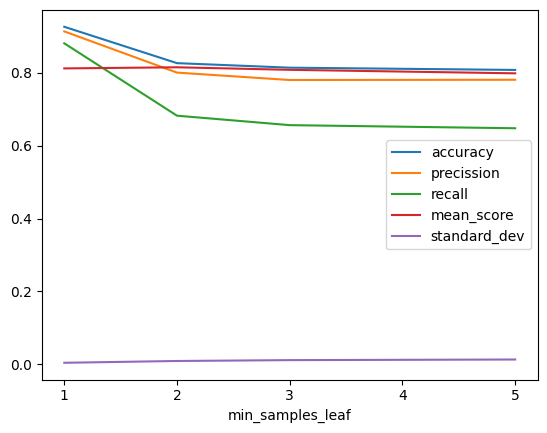

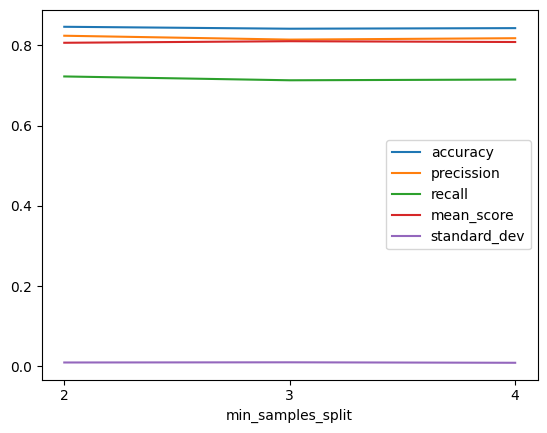

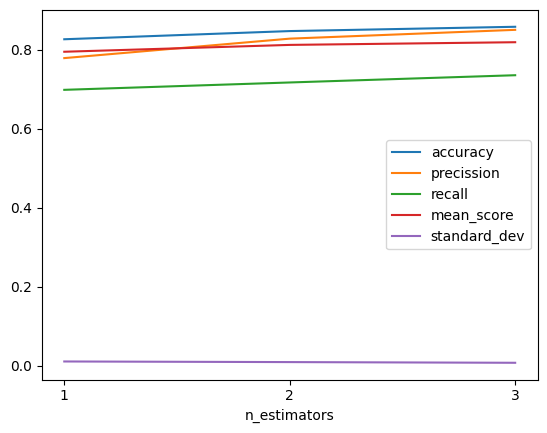

In [70]:
for i in ["max_features","min_samples_leaf",'min_samples_split', 'n_estimators']:
    df2 = pd.concat([scoresDF[[i]],scoresDF[['accuracy','precission','recall','mean_score','standard_dev']]],axis=1)
    df2 = df2.groupby(i).mean().reset_index()

    fig, ax = plt.subplots()
    # ax = fig.add_subplot(111)
    # fig, ax = plt.subplots()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    # ax.plot(df2.index,df2)
    df2.plot(ax=ax,x=i)

    

In [71]:
importances = model.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.best_estimator_.estimators_], axis=0)
forest_importances = pd.Series(importances, index=new_cols)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

ValueError: ignored

In [ ]:
# for fold,(accuracy,precision,recall) in enumerate(zip(score['test_accuracy'],score['test_precision'],score['test_recall'])):
#     print(f"Outer Fold {fold}: Accuracy={accuracy}, Precision={precision}, Recall={recall}")

In [ ]:
# from sklearn.metrics import 

In [ ]:
# from sklearn.metrics import get_scorer_names
# get_scorer_names()

In [ ]:
# RF_n_est_in.score.best_params_

In [ ]:
# RF_n_est_in.score(X_adults_test,Y_adults_test)

In [ ]:
# params = {'criterion':{'gini', 'entropy', 'log_loss'}}
# RFC = RandomForestClassifier()


In [ ]:
print(pd.DataFrame([[1,23,3]],columns=['a','b','c']))